In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('viviendas_totales_limpio.csv')
df.head()

,tipo,titulo,direccion,precio,terreno,construccion,hab,baños,estac,pisc
0,Apartamento En Renta,Apartamento En Alquiler En Lecheria Resd Tepui...,"Diego Bautista Urbaneja, Lechería, Anzoategui",270.0,42.0,42.0,1.0,1.0,1.0,True
1,Casa En Venta,Casa Bote C,"sector aquavilla, Diego Bautista Urbaneja, Lec...",2000.0,201.0,120.0,NaN,NaN,NaN,False
2,Apartamento En Venta,Lujoso Apartamento Dúplex En Planta Baja Condo...,"Avenida La Costa, Diego Bautista Urbaneja, Lec...",245000.0,194.0,164.0,NaN,NaN,NaN,False
3,Apartamento En Renta,Alquiler Apartamento En El Conjunto Residencia...,"Sector la Salina, Diego Bautista Urbaneja, Lec...",700.0,120.0,120.0,3.0,2.0,2.0,True
4,Apartamento En Renta,Se Alquila Hermoso Apartamento En El Conjunto ...,"1, Diego Bautista Urbaneja, Lechería, Anzoategui",350.0,46.0,46.0,1.0,1.0,1.0,False


Eliminando valores que esten "En Renta"

In [3]:
mask = ~df['tipo'].str.endswith('En Renta')
df = df.loc[mask]

In [4]:
mask = ~df['tipo'].str.startswith('Local')
df = df.loc[mask]
mask = ~df['tipo'].str.startswith('Galpon')
df = df.loc[mask]

In [5]:
df.head()

,tipo,titulo,direccion,precio,terreno,construccion,hab,baños,estac,pisc
1,Casa En Venta,Casa Bote C,"sector aquavilla, Diego Bautista Urbaneja, Lec...",2000.0,201.0,120.0,NaN,NaN,NaN,False
2,Apartamento En Venta,Lujoso Apartamento Dúplex En Planta Baja Condo...,"Avenida La Costa, Diego Bautista Urbaneja, Lec...",245000.0,194.0,164.0,NaN,NaN,NaN,False
6,Casa En Venta,Amplia Casa Equipada Y Amoblada En Una Excelen...,"Neveri, Diego Bautista Urbaneja, Lechería, Anz...",295000.0,509.0,400.0,6.0,5.0,9.0,True
7,Apartamento En Venta,Lujoso Apartamento En Venta En El Conjunto Res...,"Diego Bautista Urbaneja, Lechería, Anzoategui",42000.0,120.0,120.0,NaN,NaN,NaN,False
8,Penthouse En Venta,Espacioso E Imponente PENTHOUSE En Residencias...,"Calle Merey, Diego Bautista Urbaneja, Lechería...",250000.0,375.0,375.0,4.0,4.0,2.0,True


In [6]:
df.shape

(237, 10)

In [7]:
df.dtypes

tipo             object
titulo           object
direccion        object
precio          float64
terreno         float64
construccion    float64
hab             float64
baños           float64
estac           float64
pisc               bool
dtype: object

In [8]:
df.isnull()

,tipo,titulo,direccion,precio,terreno,construccion,hab,baños,estac,pisc
1,False,False,False,False,False,False,True,True,True,False
2,False,False,False,False,False,False,True,True,True,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,True,True,False
8,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
378,False,False,False,False,False,False,True,True,True,False
379,False,False,False,False,False,False,True,True,True,False
381,False,False,False,False,False,False,False,False,False,False
382,False,False,False,False,False,False,True,True,True,False


In [9]:
df.isnull().sum(axis=0)

tipo              0
titulo            0
direccion         0
precio            0
terreno           0
construccion      0
hab             117
baños           117
estac           117
pisc              0
dtype: int64

In [10]:
df.describe()

,precio,terreno,construccion,hab,baños,estac
count,2.370000e+02,237.000000,237.000000,120.000000,120.000000,120.000000
mean,2.001997e+05,153.229481,184.546878,3.408333,2.950000,3.183333
std,2.673418e+05,145.477240,171.405494,2.124273,1.482956,10.853481
min,2.800000e+01,0.000000,1.030000,1.000000,1.000000,0.000000
25%,6.000000e+04,70.000000,84.000000,2.000000,2.000000,1.000000
50%,1.170000e+05,113.000000,125.000000,3.000000,2.000000,2.000000
75%,2.300000e+05,200.000000,220.000000,4.000000,4.000000,2.000000
max,1.690000e+06,975.000000,975.000000,21.000000,8.000000,120.000000


In [11]:
df['hab'].isnull()

1       True
2       True
6      False
7       True
8      False
       ...  
378     True
379     True
381    False
382     True
383     True
Name: hab, Length: 237, dtype: bool

In [12]:
df.loc[378]

tipo                                                Casa En Venta
titulo                          Casa En Lechería Sector Morro III
direccion       Sector Morro III, Diego Bautista Urbaneja, Lec...
precio                                                   120000.0
terreno                                                     200.0
construccion                                                165.0
hab                                                           NaN
baños                                                         NaN
estac                                                         NaN
pisc                                                        False
Name: 378, dtype: object

In [13]:
df.sort_values(by="precio", ascending=False)

,tipo,titulo,direccion,precio,terreno,construccion,hab,baños,estac,pisc
344,Casa En Venta,Espectacular Mansión Conjunto Residencial LAS ...,"Las Villas, Diego Bautista Urbaneja, Lechería,...",1690000.0,1.445,663.000,6.0,6.0,6.0,False
221,Casa En Venta,HERMOSA CASA EN EL C.R. LAS VILLAS EN VENTA,"Av. Daniel Octavio Camejo, Diego Bautista Urba...",1600000.0,1.445,870.000,NaN,NaN,NaN,False
374,Casa En Venta,Casa En Venta Lecheria CR Las Villas,"Octavio Camejo, Diego Bautista Urbaneja, Leche...",1500000.0,1.360,700.000,NaN,NaN,NaN,False
35,Casa En Venta,Lujosa Villa En Venta,"Diego Bautista Urbaneja, Lechería, Anzoategui",1300000.0,800.000,800.000,6.0,6.0,6.0,True
335,Casa En Venta,Hermosa Villa Con Acabados De Lujo,"Avenida Daniel Octavio Camejo, Diego Bautista ...",1300000.0,1.308,800.000,8.0,8.0,6.0,False
...,...,...,...,...,...,...,...,...,...,...
46,Casa En Venta,VILLA VACACIONAL,"LAS VILLAS DE LECHERIA, Diego Bautista Urbanej...",550.0,1.964,1.964,NaN,NaN,NaN,False
162,Apartamento En Venta,HERMOSO TOWN HOUSE CON MUELLE PROPIO EN ALQUIL...,"AV R16, Diego Bautista Urbaneja, Lechería, Anz...",120.0,125.000,125.000,3.0,2.0,2.0,True
50,Town House En Venta,Town House Conjunto Residencial La Caleta,"AV: Octavio Camejo, Diego Bautista Urbaneja, L...",85.0,72.000,72.000,NaN,NaN,NaN,False
282,Apartamento En Venta,Le Ofrecemos Apartamento En Venta Res. Karina ...,"LECHERIA AL FRENTE DE CASA DANNA, Diego Bautis...",50.0,65.000,65.000,2.0,2.0,2.0,True


In [14]:
mask = df['tipo'].str.startswith('Apartamento')
df_apartamento = df.loc[mask].copy()

In [15]:
df_apartamento.shape

(128, 10)

In [16]:
df = df.drop(df[df['tipo'].str.startswith('Apartamento')].index)

In [17]:
df.shape

(109, 10)

In [18]:
df.sort_values(by="precio", ascending=False)

,tipo,titulo,direccion,precio,terreno,construccion,hab,baños,estac,pisc
344,Casa En Venta,Espectacular Mansión Conjunto Residencial LAS ...,"Las Villas, Diego Bautista Urbaneja, Lechería,...",1690000.0,1.445,663.000,6.0,6.0,6.0,False
221,Casa En Venta,HERMOSA CASA EN EL C.R. LAS VILLAS EN VENTA,"Av. Daniel Octavio Camejo, Diego Bautista Urba...",1600000.0,1.445,870.000,NaN,NaN,NaN,False
374,Casa En Venta,Casa En Venta Lecheria CR Las Villas,"Octavio Camejo, Diego Bautista Urbaneja, Leche...",1500000.0,1.360,700.000,NaN,NaN,NaN,False
335,Casa En Venta,Hermosa Villa Con Acabados De Lujo,"Avenida Daniel Octavio Camejo, Diego Bautista ...",1300000.0,1.308,800.000,8.0,8.0,6.0,False
35,Casa En Venta,Lujosa Villa En Venta,"Diego Bautista Urbaneja, Lechería, Anzoategui",1300000.0,800.000,800.000,6.0,6.0,6.0,True
...,...,...,...,...,...,...,...,...,...,...
12,Oficinas En Venta,Oficina En Lechería,"venezuela, Diego Bautista Urbaneja, Lechería, ...",31000.0,26.000,26.000,NaN,NaN,NaN,False
266,Oficinas En Venta,"EN VENTA,OFICINA EN CENTRIO COMERCIAL G, CALLE...","El Peñonal, Diego Bautista Urbaneja, Lechería,...",19500.0,22.000,22.000,NaN,NaN,NaN,False
1,Casa En Venta,Casa Bote C,"sector aquavilla, Diego Bautista Urbaneja, Lec...",2000.0,201.000,120.000,NaN,NaN,NaN,False
46,Casa En Venta,VILLA VACACIONAL,"LAS VILLAS DE LECHERIA, Diego Bautista Urbanej...",550.0,1.964,1.964,NaN,NaN,NaN,False


In [19]:
df_apartamento.sort_values(by="precio", ascending=True)

,tipo,titulo,direccion,precio,terreno,construccion,hab,baños,estac,pisc
198,Apartamento En Venta,Se Ofrece En Venta Apartamento De Residencia L...,"Av.Bolivar, lecheria, Diego Bautista Urbaneja,...",28.0,42.0,42.0,NaN,NaN,NaN,False
282,Apartamento En Venta,Le Ofrecemos Apartamento En Venta Res. Karina ...,"LECHERIA AL FRENTE DE CASA DANNA, Diego Bautis...",50.0,65.0,65.0,2.0,2.0,2.0,True
162,Apartamento En Venta,HERMOSO TOWN HOUSE CON MUELLE PROPIO EN ALQUIL...,"AV R16, Diego Bautista Urbaneja, Lechería, Anz...",120.0,125.0,125.0,3.0,2.0,2.0,True
114,Apartamento En Venta,"Apartamento Penhouse En Residencias Avenida, P...","Principal de Lecheria, Diego Bautista Urbaneja...",14000.0,111.0,111.0,NaN,NaN,NaN,False
37,Apartamento En Venta,"Apartamento En Venta, Conjunto Residencial Moc...","APAMATES, Diego Bautista Urbaneja, Lechería, A...",18500.0,81.0,81.0,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...
33,Apartamento En Venta,EXCLUSIVO APARTAMENTO EN VENTA. EL MORRO,"Diego Bautista Urbaneja, Lechería, Anzoategui",350000.0,165.0,165.0,3.0,3.0,3.0,True
165,Apartamento En Venta,"HERMOSO APARTAMENTO, AMOBLADO Y EQUIPADO DE LU...","AV R8, Diego Bautista Urbaneja, Lechería, Anzo...",365000.0,220.0,220.0,4.0,4.0,2.0,True
245,Apartamento En Venta,APARTAMENTO EN VENTA RES. MONARCA LECHERIA,"AVENIDA BOULEVARD, Diego Bautista Urbaneja, Le...",432000.0,362.0,362.0,6.0,6.0,2.0,True
173,Apartamento En Venta,EN VENTA HERMOSO APARTAMENTO EN EL C.R. FRANCI...,"AV. Américo Vespucio, Diego Bautista Urbaneja,...",450000.0,276.0,276.0,NaN,NaN,NaN,False


In [20]:
df_apartamento.loc[198].titulo

'Se Ofrece En Venta Apartamento De Residencia Las Hernandas'

In [21]:
df_apartamento.loc[198].direccion

'Av.Bolivar, lecheria, Diego Bautista Urbaneja, Lechería, Anzoategui'

In [22]:
df_apartamento.loc[198]

tipo                                         Apartamento En Venta
titulo          Se Ofrece En Venta Apartamento De Residencia L...
direccion       Av.Bolivar, lecheria, Diego Bautista Urbaneja,...
precio                                                       28.0
terreno                                                      42.0
construccion                                                 42.0
hab                                                           NaN
baños                                                         NaN
estac                                                         NaN
pisc                                                        False
Name: 198, dtype: object

<AxesSubplot:>

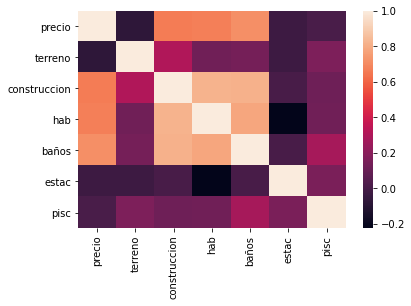

In [23]:
sns.heatmap(df.corr())

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


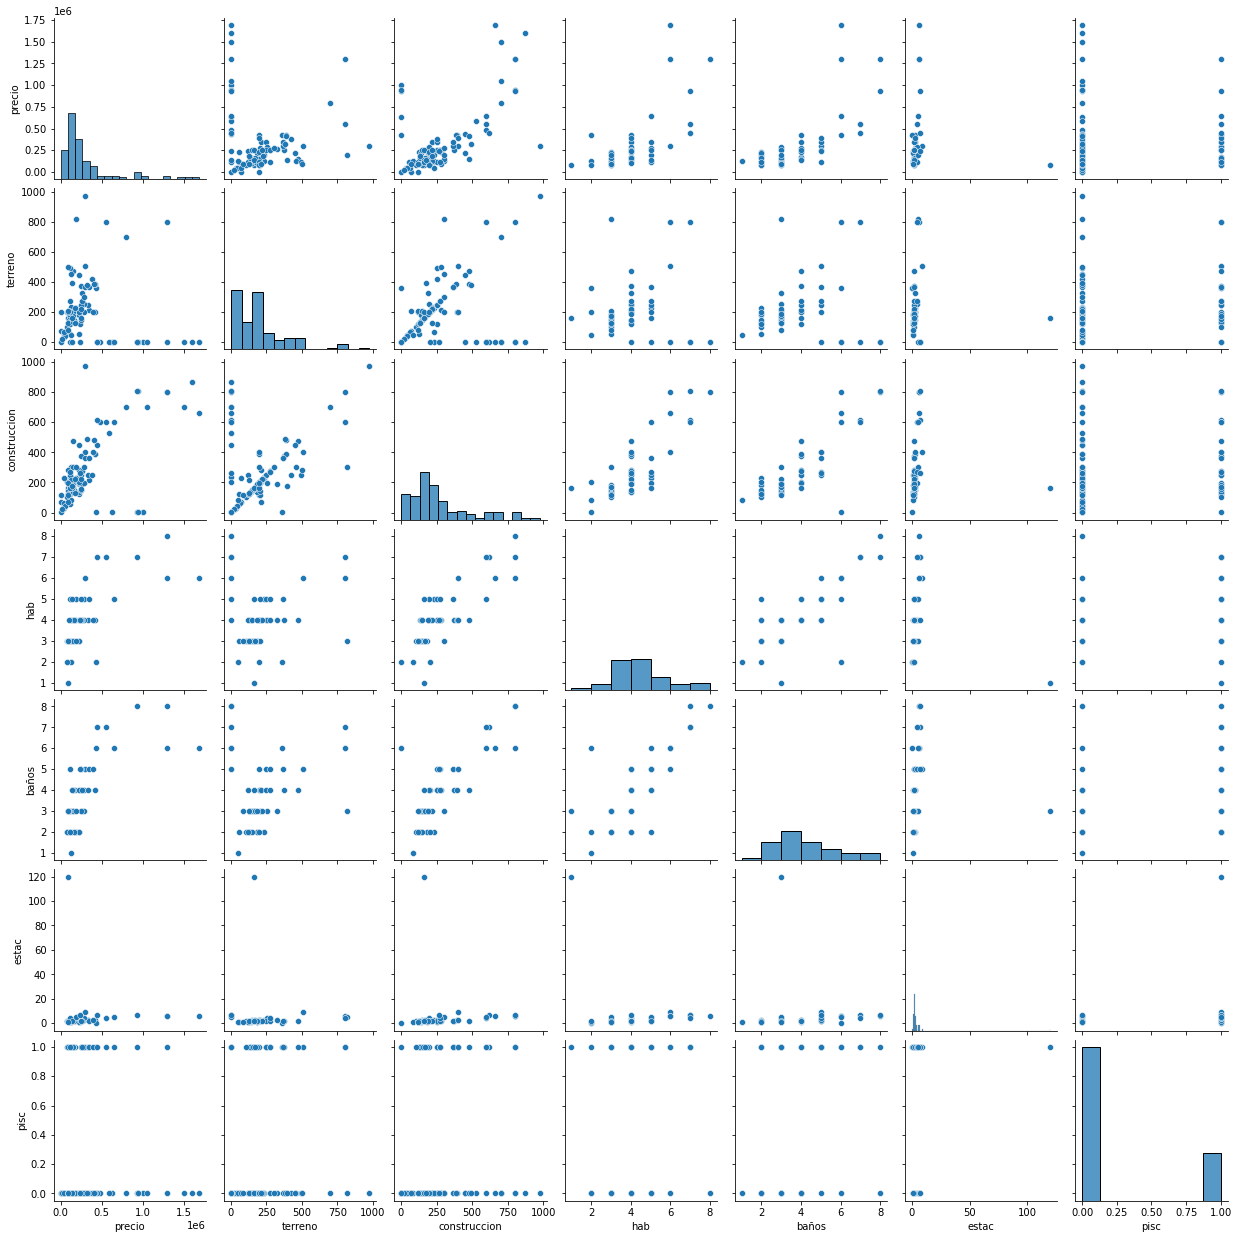

In [25]:
sns.pairplot(df)

(array([50., 31., 12.,  4.,  1.,  5.,  1.,  2.,  1.,  2.]),
 array([8.5000000e+01, 1.6907650e+05, 3.3806800e+05, 5.0705950e+05,
        6.7605100e+05, 8.4504250e+05, 1.0140340e+06, 1.1830255e+06,
        1.3520170e+06, 1.5210085e+06, 1.6900000e+06]),
 <BarContainer object of 10 artists>)

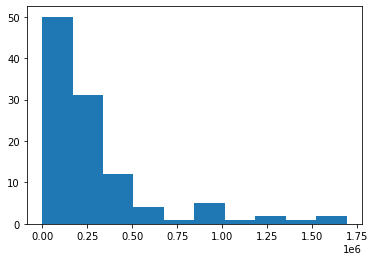

In [26]:
plt.hist(df['precio'])

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


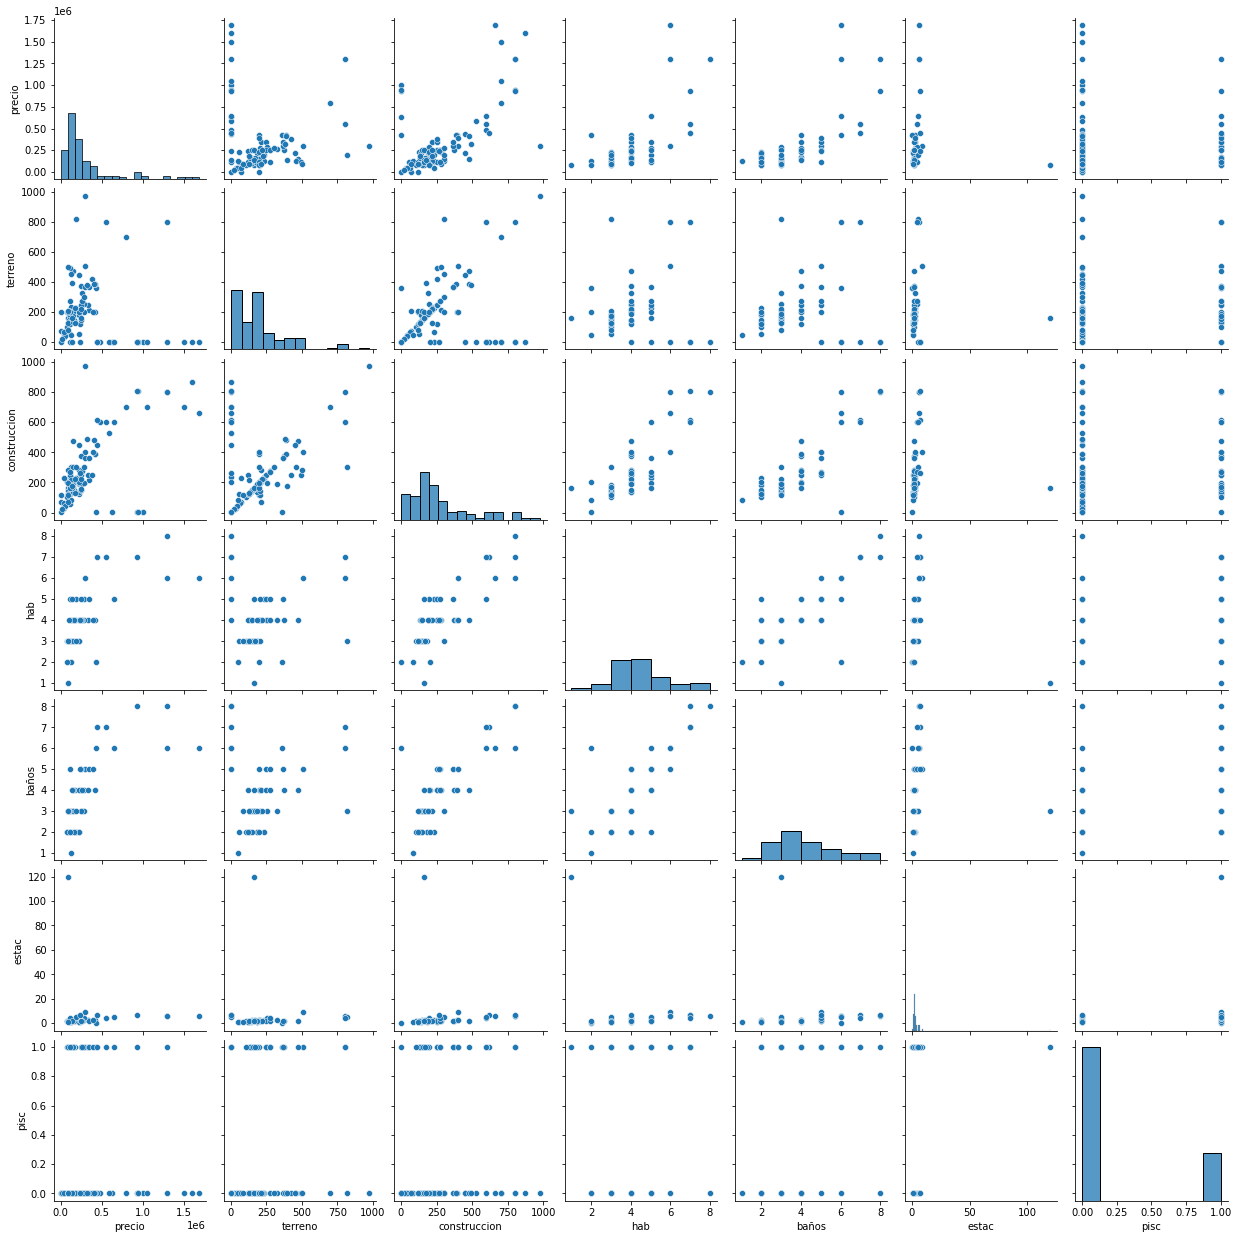

In [27]:
sns.pairplot(df)

La mayor relacion existente con precio es la de terreno